# LA-ICP-MS dataset processing
## required packets

In [1]:
from process_image import *
import cv2
import matplotlib.pyplot as plt

## basic settings
set some basic infos for the image procesing

In [2]:
settings = getBaseSettings()

# show debugging output
settings["showDebuggingOutput"] = True
# set the physical spot distance in µm
#settings["spot_distance_x"]     = 7.0
#settings["spot_distance_y"]     = 0.579150579150579

## export map AB4 Bereich 2
#settings["spot_distance_x"]     = 6.312183673469388
#settings["spot_distance_y"]     = 0.5892393822393822

## export map AB4 Bereich 3
#settings["spot_distance_x"]     = 483.84/80  # 6.0480
#settings["spot_distance_y"]     = 343.36/603 # 0.5688



# change interpolation between the lines in x direction [integer, 0 disables this option]
settings["stretch_x"]           = 6
# set the gaussian filter size in y direction [integer, 0 disables this option]
settings["smooth_y"]            = 3


## set & select the data source
select the datasource - if load_raw = True, the script expects a path to the raw dataset consisting of multiple *.xl files. Else, the script expects an excel file with multiple sheets.

If no `workingDirectory` or `excel_file` is set, the script opens a file dialog.


In [3]:

#settings["load_raw"]   = True
#settings["workingDirectory"] = settings["home_dir"] + os.sep + "example_data" + os.sep + "raw format" + os.sep

#settings["load_raw"]   = False
#settings["excel_file"] = settings["home_dir"] + os.sep + "example_data" + os.sep + "excel_example.xlsx"

#settings["load_raw"]   = False
#settings["excel_file"] = "C:/Users/Florian Kleiner/Documents/Nextcloud/Uni/WdB/Paper/Laser-ICP&EDX/Rohdaten/KlikerWe2_Klinker_Berecih 3.xlsx"

#do_phase_evaluation    = True
#phase_mask_path       = 'E:/nextcloud/Uni/WdB/Paper/Laser-ICP&EDX/EDX-Daten/EDX Serie 2 06-2020/export map AB4 Bereich 2/Alignments/3/'
#phase_mask_path       = 'C:/Users/Florian Kleiner/Documents/Nextcloud/Uni/WdB/Paper/Laser-ICP&EDX/EDX-Daten/EDX Serie 2 06-2020/export map AB4 Bereich 2/Alignments/3/'
#phase_mask_path        = 'C:/Users/Florian Kleiner/Documents/Nextcloud/Uni/WdB/Paper/Laser-ICP&EDX/Auswertung Bereich 2/align EDX-LA/'

path = "C:/Users/Florian Kleiner/Documents/Nextcloud/Uni/WdB/Paper/Laser-ICP&EDX/"

# area 1
settings["load_raw"]   = True
settings["workingDirectory"] = path + "Auswertung Bereich 1+Spot/3 - LA-ICP-MS/LA-ICP-MS_raw data/"
# trim values will only be used for the raw data.
settings["trim_top"]            = 144
settings["trim_bottom"]         = 37
# image size measured from the SEM-images
settings["img_width"]           = 305.2
settings["img_height"]          = 309.3

do_phase_evaluation   = True
phase_mask_path       = path + "Auswertung Bereich 1+Spot/3 - LA-ICP-MS/phase masks/"
print(phase_mask_path)
# area 2
"""
settings["load_raw"]   = True
settings["workingDirectory"] = path + "Auswertung Bereich 2/3 - LA-ICP-MS/LA-ICP-MS_raw data/"
# trim values will only be used for the raw data.
settings["trim_top"]            = 144
settings["trim_bottom"]         = 53
# image size measured from the SEM-images
settings["img_width"]           = 483.84
settings["img_height"]          = 343.36

do_phase_evaluation   = True
phase_mask_path       = path + "Auswertung Bereich 2/align EDX-LA/La-ICP-MS phase masks/"
"""

# area 3
"""
settings["load_raw"]   = True
settings["workingDirectory"] = path + "Auswertung Bereich 3/3 - LA-ICP-MS/Rohdaten/"
# trim values will only be used for the raw data.
settings["trim_top"]            = 234
settings["trim_bottom"]         = 128
# image size measured from the SEM-images
settings["img_width"]           = 419.33
settings["img_height"]          = 302.65 

do_phase_evaluation   = True
phase_mask_path       = path + "Auswertung Bereich 3/alignment/La-ICP-MS phase masks/"
"""


C:/Users/Florian Kleiner/Documents/Nextcloud/Uni/WdB/Paper/Laser-ICP&EDX/Auswertung Bereich 1+Spot/3 - LA-ICP-MS/phase masks/


'\nsettings["load_raw"]   = True\nsettings["workingDirectory"] = path + "Auswertung Bereich 3/3 - LA-ICP-MS/Rohdaten/"\n# trim values will only be used for the raw data.\nsettings["trim_top"]            = 234\nsettings["trim_bottom"]         = 128\n# image size measured from the SEM-images\nsettings["img_width"]           = 419.33\nsettings["img_height"]          = 302.65 \n\ndo_phase_evaluation   = True\nphase_mask_path       = path + "Auswertung Bereich 3/alignment/La-ICP-MS phase masks/"\n'

## set phases to be analysed
Only relevant, if *do_phase_evaluation* is *True*.

In [4]:
phases = [  
    'alite',
    'belite',
    'C4AF' 
]

## initiate main class

In [5]:
laser_data = LA_ICP_MS_LOADER(settings)
laser_data.preprocess_images()
laser_data.save_images()

Selected working directory: C:/Users/Florian Kleiner/Documents/Nextcloud/Uni/WdB/Paper/Laser-ICP&EDX/Auswertung Bereich 1+Spot/3 - LA-ICP-MS/LA-ICP-MS_raw data/
successfully loaded the dataset:
  raw dataset size: 50 x 519
  dimensions:       305.20 x 309.30 µm
  pixel dimension:  6.1040 x 0.5960 µm
  11 elements:      ²³Na, ²⁴Mg, ²⁷Al, ³⁹K, ⁴⁷Ti, ⁵¹V, ⁵²Cr, ⁵⁵Mn, ⁶⁶Zn, ⁸⁷Rb, ¹³⁷Ba

Images will be stored in : processed


## Calibration settings / ICP measurements

The concentrations can be given in g/kg (add in *icp_ms* vaiable) or m.-% (add in *icp_oes* vaiable).

Unused elements will be **ignored**. 
Missing elements will be set to **0**!

In [6]:
print('Known elements for calibration: ')
s = ''
for element in laser_data.oxide_dict: s += element+', '
print( s )

Known elements for calibration: 
Na, Mg, Al, K, Ti, V, Cr, Mn, Zn, Rb, Ba, Ca, Sr, P, Cu, Ni, Pb, As, Si, Fe, 


In [7]:
#ICP MS concentrations [g/kg]
icp_ms = {
    "As":  0.00642,
    "Ba":  0.185,
    "Be":  0.00074,
    "Cd":  0.0005,
    "Co":  0.0111,
    "Cr":  0.0671,
    "Cu":  0.107,
    "Hg":  0.00005,
    "Mn":  0.00275,
    "Mo":  0.00250,
    "Ni":  0.0771,
    "Pb":  0.00220,
    "Sb":  0.00501,
    "Se":  0.00440,
    "Sn":  0.00712,
    "Sr":  1.254,
    "Ti":  1.431,
    "V" :  0.0527,
    "W" :  0.00733,
    "Zn":  0.294
}


In [8]:
#m-%
icp_oes = {   
    'Ca':	64.81,
    'Si':	22.44,
    'Al':	4.67,
    'Fe':	2.59,
    'Mg':	1.36,
    'K':	1.26,
    'Na':	0.41,
    'Ti':	0.24,
    'Zn':	0.04,
    'Mn':	0.04
}

In [9]:
if True:#do_phase_evaluation:
    calibrated_mpO = laser_data.calculate_calibration_factors( icp_oes, icp_ms, True )

7 of 10 elements in the ICP values are also present in the La-ICP-MS data
6 of 20 elements in the ICP values are also present in the La-ICP-MS data
Missing elements in the ICP calibration data: Rb
element Rb missing


# set calibration data if available

this dictionary requires the calibration factor for ppm in [signal / ppm]

Since the oxide form of every element has to be known, there is only a limited amount of known elements:

In [10]:
print('Known elements for calibration: ')
s = ''
for element in laser_data.oxide_dict: s += element+', '
print( s )


Known elements for calibration: 
Na, Mg, Al, K, Ti, V, Cr, Mn, Zn, Rb, Ba, Ca, Sr, P, Cu, Ni, Pb, As, Si, Fe, 


In [11]:
"""
calibration_area_2 = {
    "Na23" :  1.171,
    "Mg24" :  3.953,
    "Al27" :  2.711,
    "K39"  :  9.495,
    "Ti47" :  0.488,
    "V51"  :  5.701,
    "Cr52" :  4.876,
    "Mn55" :  5.554,
    "Zn66" :  0.527,
    "Rb87" : 18.741,
    "Ba137":  0.391
}

calibration_area_3 = {
    "Na23":   2.502,
    "Mg24":   6.373,
    "Al27":   4.361,
    "K39":    8.945,
    "Ti47":   0.796,
    "V51":    8.401,
    "Cr52":   5.959,
    "Mn55":  10.281,
    "Zn66":   0.801,
    "Rb87":  27.477,
    "Ba137":  0.771
}

calibration_area_4 = {
    "Na23":   2.502,
    "Mg24":   6.373,
    "Al27":   4.361,
    "K39":    8.945,
    "Ti47":   0.796,
    "V51":    8.401,
    "Cr52":   5.959,
    "Mn55":  10.281,
    "Zn66":   0.801,
    "Rb87":  27.477,
    "Ba137":  0.771,
    "Si29":   1,
    "Ca43":   1,
    "Fe57":   1
}

laser_data.set_calibration_dictionary( calibration_area_4 )"""

'\ncalibration_area_2 = {\n    "Na23" :  1.171,\n    "Mg24" :  3.953,\n    "Al27" :  2.711,\n    "K39"  :  9.495,\n    "Ti47" :  0.488,\n    "V51"  :  5.701,\n    "Cr52" :  4.876,\n    "Mn55" :  5.554,\n    "Zn66" :  0.527,\n    "Rb87" : 18.741,\n    "Ba137":  0.391\n}\n\ncalibration_area_3 = {\n    "Na23":   2.502,\n    "Mg24":   6.373,\n    "Al27":   4.361,\n    "K39":    8.945,\n    "Ti47":   0.796,\n    "V51":    8.401,\n    "Cr52":   5.959,\n    "Mn55":  10.281,\n    "Zn66":   0.801,\n    "Rb87":  27.477,\n    "Ba137":  0.771\n}\n\ncalibration_area_4 = {\n    "Na23":   2.502,\n    "Mg24":   6.373,\n    "Al27":   4.361,\n    "K39":    8.945,\n    "Ti47":   0.796,\n    "V51":    8.401,\n    "Cr52":   5.959,\n    "Mn55":  10.281,\n    "Zn66":   0.801,\n    "Rb87":  27.477,\n    "Ba137":  0.771,\n    "Si29":   1,\n    "Ca43":   1,\n    "Fe57":   1\n}\n\nlaser_data.set_calibration_dictionary( calibration_area_4 )'

# show an example image (first element in the set)

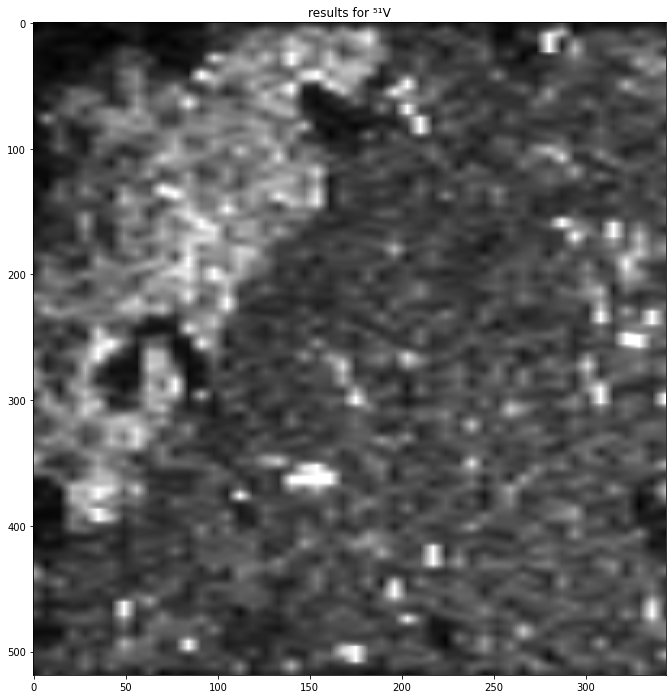

In [12]:
example_element = 'V51'
v51 = laser_data.show_single_image(element=example_element)

alite
Na: 0.32944 ± 0.1596 m.-%
Mg: 1.56251 ± 0.4128 m.-%
Al: 4.37513 ± 2.8960 m.-%
K : 1.15020 ± 0.2994 m.-%
Ti: 0.24956 ± 0.0884 m.-%
V : 0.00862 ± 0.0027 m.-%
Cr: 0.00994 ± 0.0007 m.-%
Mn: 0.00045 ± 0.0002 m.-%
Zn: 0.03126 ± 0.0220 m.-%
Rb: 0.00000 ± 0.0000 m.-%
Ba: 0.01762 ± 0.0104 m.-%

belite
Na: 0.49158 ± 0.2338 m.-%
Mg: 1.06978 ± 0.5590 m.-%
Al: 4.12088 ± 3.1957 m.-%
K : 1.41390 ± 0.4487 m.-%
Ti: 0.25794 ± 0.0869 m.-%
V : 0.01448 ± 0.0049 m.-%
Cr: 0.00942 ± 0.0008 m.-%
Mn: 0.00040 ± 0.0001 m.-%
Zn: 0.02657 ± 0.0229 m.-%
Rb: 0.00000 ± 0.0000 m.-%
Ba: 0.03268 ± 0.0133 m.-%

C4AF
Na: 0.40430 ± 0.1883 m.-%
Mg: 1.90359 ± 0.5059 m.-%
Al: 7.87792 ± 4.1690 m.-%
K : 1.16997 ± 0.2427 m.-%
Ti: 0.33296 ± 0.1231 m.-%
V : 0.00912 ± 0.0035 m.-%
Cr: 0.00985 ± 0.0007 m.-%
Mn: 0.00059 ± 0.0002 m.-%
Zn: 0.03469 ± 0.0201 m.-%
Rb: 0.00000 ± 0.0000 m.-%
Ba: 0.02202 ± 0.0128 m.-%



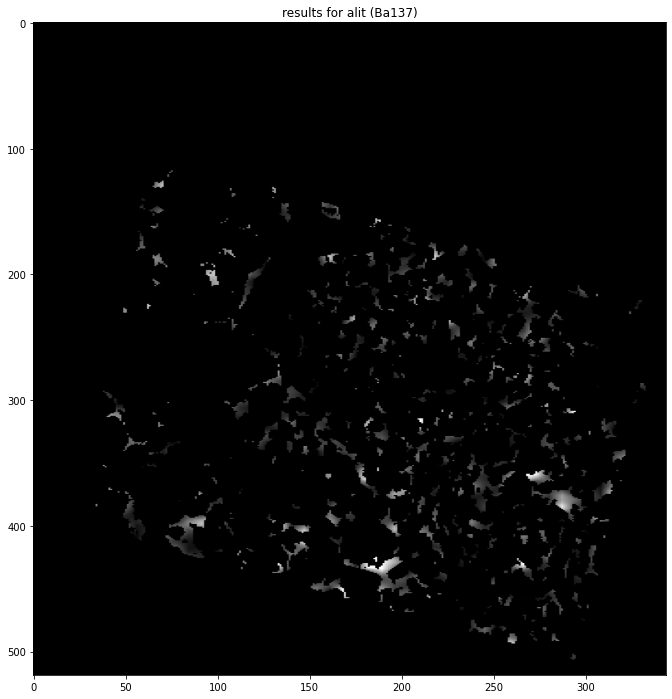

In [13]:
# get interpolated rawdata
if do_phase_evaluation:
    for phase_mask in phases:
        print(phase_mask)
        #load calibrated values
        for element in laser_data.np_images.keys():

            la_icp_ms_element = calibrated_mpO[get_element_from_isotope( element )]*100
            img = cv2.imread(phase_mask_path + 'aligned' + phase_mask + '.png' , cv2.IMREAD_GRAYSCALE)
            
            # make shure the image is a mask
            _, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
            # make the threshold binary 
            mask = (thresh1/255).astype(int)

            # select pixel/values from the raw data
            selected_values = []
            for ix,iy in np.ndindex(mask.shape):
                if mask[ix,iy] == 1:
                    selected_values.append(la_icp_ms_element[ix,iy])
            selected_values = np.array(selected_values)
            #some isotopes make only a small portion of an natual element
            isotope_abundance = get_isotope_abundance(element)

            iso_mean = selected_values.mean()
            iso_std  = selected_values.std()
            el_mean  = iso_mean/isotope_abundance
            el_std   = iso_std /isotope_abundance
            
            print('{:2}: {:.5f} ± {:.4f} m.-%'.format(get_element_from_isotope(element), iso_mean, iso_std))

            #show the EDX-selection
            if element == 'Ba137':#'K39':# 'Ba137':#'Rb87':
                # select pixel/values from the raw data
                selected = la_icp_ms_element * mask
                plt.rcParams['figure.figsize'] = [12, 12]
                plt.title('results for alit ({})'.format(element))
                plt.imshow(selected, aspect=laser_data.spot_distance_y/laser_data.spot_distance_x, cmap='gray', interpolation=None)
        print()
else:
    print('Phase evaluation skipped!')

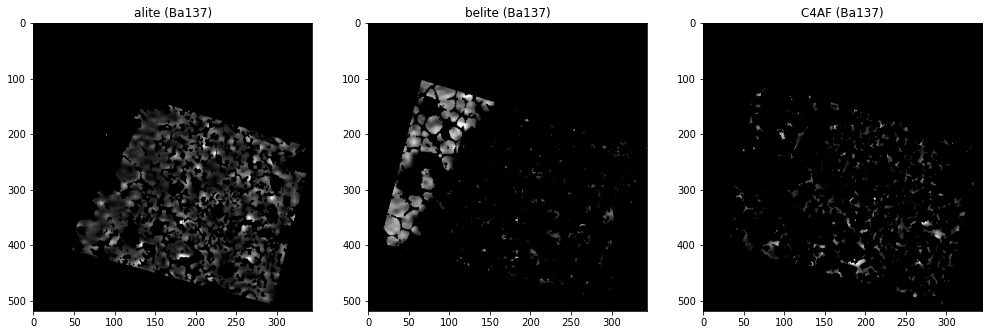

In [35]:
i = 0
fig = plt.figure(figsize=(17, 12))
# get interpolated rawdata
if True:#do_phase_evaluation:
    for phase_mask in phases:
        i += 1        
        element = 'Ba137'
        la_icp_ms_element = calibrated_mpO[get_element_from_isotope( element )]*100
        img = cv2.imread(phase_mask_path + 'aligned' + phase_mask + '.png' , cv2.IMREAD_GRAYSCALE)
        # make shure the image is a mask
        _, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
        # make the threshold binary 
        mask = (thresh1/255).astype(int)
        
        # select pixel/values from the raw data
        selected = la_icp_ms_element * mask
        fig.add_subplot(1,len(phases), i)
        plt.title('{} ({})'.format(phase_mask, element))
        plt.imshow(selected, aspect=laser_data.spot_distance_y/laser_data.spot_distance_x, cmap='gray', interpolation=None)
else:
    print('Phase evaluation skipped!')
plt.show()

alite
Na: 0.32944 ± 0.1596 m.-%
Mg: 1.56251 ± 0.4128 m.-%
Al: 4.37513 ± 2.8960 m.-%
K : 1.15020 ± 0.2994 m.-%
Ti: 0.24956 ± 0.0884 m.-%
V : 0.00862 ± 0.0027 m.-%
Cr: 0.00994 ± 0.0007 m.-%
Mn: 0.00045 ± 0.0002 m.-%
Zn: 0.03126 ± 0.0220 m.-%
Rb: 0.00000 ± 0.0000 m.-%
Ba: 0.01762 ± 0.0104 m.-%

belite
Na: 0.49158 ± 0.2338 m.-%
Mg: 1.06978 ± 0.5590 m.-%
Al: 4.12088 ± 3.1957 m.-%
K : 1.41390 ± 0.4487 m.-%
Ti: 0.25794 ± 0.0869 m.-%
V : 0.01448 ± 0.0049 m.-%
Cr: 0.00942 ± 0.0008 m.-%
Mn: 0.00040 ± 0.0001 m.-%
Zn: 0.02657 ± 0.0229 m.-%
Rb: 0.00000 ± 0.0000 m.-%
Ba: 0.03268 ± 0.0133 m.-%

C4AF
Na: 0.40430 ± 0.1883 m.-%
Mg: 1.90359 ± 0.5059 m.-%
Al: 7.87792 ± 4.1690 m.-%
K : 1.16997 ± 0.2427 m.-%
Ti: 0.33296 ± 0.1231 m.-%
V : 0.00912 ± 0.0035 m.-%
Cr: 0.00985 ± 0.0007 m.-%
Mn: 0.00059 ± 0.0002 m.-%
Zn: 0.03469 ± 0.0201 m.-%
Rb: 0.00000 ± 0.0000 m.-%
Ba: 0.02202 ± 0.0128 m.-%



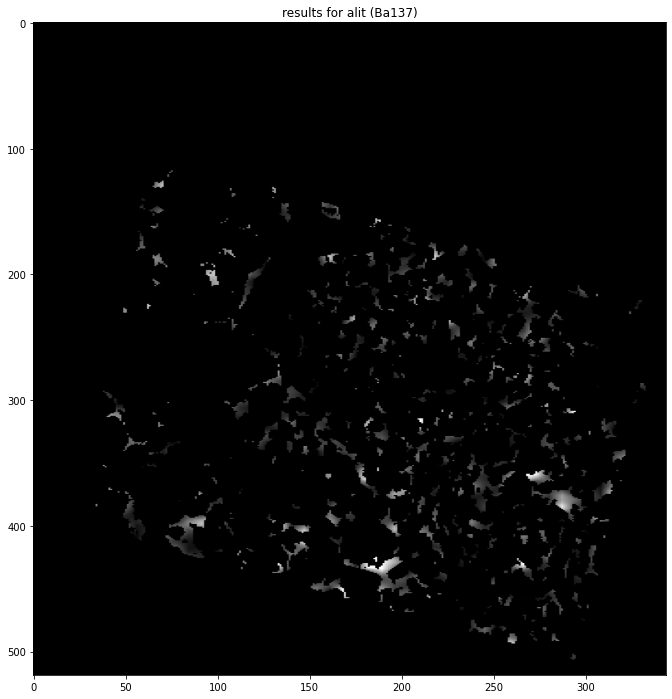

In [15]:
# get interpolated rawdata
if do_phase_evaluation:
    for phase_mask in phases:
        print(phase_mask)
        #load calibrated values
        for element in laser_data.np_images.keys():

            la_icp_ms_element = calibrated_mpO[get_element_from_isotope( element )]*100
            img = cv2.imread(phase_mask_path + 'aligned' + phase_mask + '.png' , cv2.IMREAD_GRAYSCALE)
            
            # make shure the image is a mask
            _, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
            # make the threshold binary 
            mask = (thresh1/255).astype(int)

            # select pixel/values from the raw data
            selected_values = []
            for ix,iy in np.ndindex(mask.shape):
                if mask[ix,iy] == 1:
                    selected_values.append(la_icp_ms_element[ix,iy])
            selected_values = np.array(selected_values)
            #some isotopes make only a small portion of an natual element
            isotope_abundance = get_isotope_abundance(element)

            iso_mean = selected_values.mean()
            iso_std  = selected_values.std()
            el_mean  = iso_mean/isotope_abundance
            el_std   = iso_std /isotope_abundance
            
            print('{:2}: {:.5f} ± {:.4f} m.-%'.format(get_element_from_isotope(element), iso_mean, iso_std))

            #show the EDX-selection
            if element == 'Ba137':#'K39':# 'Ba137':#'Rb87':
                # select pixel/values from the raw data
                selected = la_icp_ms_element * mask
                plt.rcParams['figure.figsize'] = [12, 12]
                plt.title('results for alit ({})'.format(element))
                plt.imshow(selected, aspect=laser_data.spot_distance_y/laser_data.spot_distance_x, cmap='gray', interpolation=None)
        print()
else:
    print('Phase evaluation skipped!')